In [1]:
import pandas as pd
from nsepy import get_history 
import matplotlib.pyplot as plt
from datetime import date

In [2]:
companies = ['JSWSTEEL','TATASTEEL','JINDALSTEL','BHARATFORG','NMDC','SAIL','KIOCL']


In [3]:
stocks = []
for company in companies:
    stocks.append(get_history(symbol=company,start=date(2015,1,4),end=date(2022,3,31)))
stocks

[              Symbol Series  Prev Close     Open     High      Low     Last  \
 Date                                                                          
 2015-01-05  JSWSTEEL     EQ     1069.15  1069.15  1087.00  1058.00  1065.00   
 2015-01-06  JSWSTEEL     EQ     1066.60  1054.10  1058.95  1020.55  1022.10   
 2015-01-07  JSWSTEEL     EQ     1027.70  1016.00  1025.80   997.25  1013.55   
 2015-01-08  JSWSTEEL     EQ     1011.85  1025.00  1034.90   998.60  1021.15   
 2015-01-09  JSWSTEEL     EQ     1022.10  1027.00  1035.00  1004.05  1010.05   
 ...              ...    ...         ...      ...      ...      ...      ...   
 2022-03-25  JSWSTEEL     EQ      715.10   718.00   726.50   710.25   719.00   
 2022-03-28  JSWSTEEL     EQ      721.35   722.00   731.45   718.15   730.00   
 2022-03-29  JSWSTEEL     EQ      730.10   731.50   764.75   726.65   751.20   
 2022-03-30  JSWSTEEL     EQ      753.90   750.00   750.70   714.95   719.05   
 2022-03-31  JSWSTEEL     EQ      717.55

In [4]:
new_list = []
for company in stocks:
    colm = company.columns.values.tolist()
    temp_list = []
    for parm in colm:
        temp_list.append((parm,company["Symbol"][1]))
        company.drop(["Symbol","Series"],axis=1)
    company.columns = pd.MultiIndex.from_tuples(temp_list)
    new_list.append(company)

In [5]:
len(new_list)#should count of companies list

7

In [6]:
stocks_df = pd.concat(new_list,axis=1)
stocks_df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,...,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,JSWSTEEL,EQ,1069.15,1069.15,1087.00,1058.00,1065.00,1066.60,1073.82,339287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,JSWSTEEL,EQ,1066.60,1054.10,1058.95,1020.55,1022.10,1027.70,1038.21,554980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,JSWSTEEL,EQ,1027.70,1016.00,1025.80,997.25,1013.55,1011.85,1010.51,528687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,JSWSTEEL,EQ,1011.85,1025.00,1034.90,998.60,1021.15,1022.10,1011.86,478081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,JSWSTEEL,EQ,1022.10,1027.00,1035.00,1004.05,1010.05,1012.95,1015.75,504604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,JSWSTEEL,EQ,715.10,718.00,726.50,710.25,719.00,721.35,719.64,16121868,...,228.55,221.85,223.90,222.40,224.14,31573,7.076661e+11,1537,19760,0.6259
2022-03-28,JSWSTEEL,EQ,721.35,722.00,731.45,718.15,730.00,730.10,726.41,8935680,...,226.15,213.10,214.95,214.75,218.04,74987,1.635045e+12,3514,34816,0.4643


In [7]:
new1_df = stocks_df.drop("Symbol",axis=1,level= 0) #tocks_df.drop(("Symbol","Series"),axis=1,inplace= True) not working
new1_df1 = new1_df.drop("Series",axis=1,level = 0)
new1_df1

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,...,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1069.15,1069.15,1087.00,1058.00,1065.00,1066.60,1073.82,339287,3.643329e+13,12749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,1066.60,1054.10,1058.95,1020.55,1022.10,1027.70,1038.21,554980,5.761852e+13,16258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,1027.70,1016.00,1025.80,997.25,1013.55,1011.85,1010.51,528687,5.342434e+13,18120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,1011.85,1025.00,1034.90,998.60,1021.15,1022.10,1011.86,478081,4.837492e+13,31335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,1022.10,1027.00,1035.00,1004.05,1010.05,1012.95,1015.75,504604,5.125523e+13,18333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,715.10,718.00,726.50,710.25,719.00,721.35,719.64,16121868,1.160187e+15,135899,...,228.55,221.85,223.90,222.40,224.14,31573,7.076661e+11,1537,19760,0.6259
2022-03-28,721.35,722.00,731.45,718.15,730.00,730.10,726.41,8935680,6.490958e+14,105381,...,226.15,213.10,214.95,214.75,218.04,74987,1.635045e+12,3514,34816,0.4643


In [8]:
new1_df1.swaplevel(axis = 1).sort_index(axis = 1)# for swaping level i.e headder

BHARATFORG                                                     \
           %Deliverble   Close Deliverable Volume    High    Last     Low   
Date                                                                        
2015-01-05      0.4128  946.30             159535  956.00  943.30  940.70   
2015-01-06      0.4455  892.70             309028  940.00  894.00  875.55   
2015-01-07      0.3934  900.40             376129  909.40  902.70  875.55   
2015-01-08      0.2289  930.80             106656  935.00  932.00  906.30   
2015-01-09      0.2405  929.05              90763  942.50  927.05  918.15   
...                ...     ...                ...     ...     ...     ...   
2022-03-25      0.3167  690.30             380303  700.85  688.50  683.35   
2022-03-28      0.5209  699.50            1114982  703.85  700.00  679.05   
2022-03-29      0.3552  707.95             211527  709.60  704.70  700.05   
2022-03-30      0.3369  702.60             364735  725.30  702.50  701.00   
2022-03-31      0.4906  700.60             467286  712.35  699.65  696.80   

                                                    ...          TATASTEEL  \
              Open Prev Close Trades      Turnover  ... Deliverable Volume   
Date                                                ...                      
2015-01-05  947.25     943.20  10991  3.666035e+13  ...            1369990   
2015-01-06  940.00     946.30  23619  6.347624e+13  ...            2529632   
2015-01-07  903.70     892.70  39850  8.551862e+13  ...            1406508   
2015-01-08  906.30     900.40  13032  4.317543e+13  ...             763860   
2015-01-09  935.60     930.80  13899  3.516955e+13  ...            1222094   
...            ...        ...    ...           ...  ...                ...   
2022-03-25  699.00     694.25  24800  8.311830e+13  ...            1599967   
2022-03-28  691.00     690.30  36680  1.475165e+14  ...             899147   
2022-03-29  705.70     699.50  19477  4.198531e+13  ...             937510   
2022-03-30  710.15     707.95  32837  7.733208e+13  ...            2151937   
2022-03-31  704.60     702.60  27008  6.705618e+13  ...            1117463   

                                                                  \
               High     Last      Low    Open Prev Close  Trades   
Date                                                               
2015-01-05   421.45   417.95   413.00   413.0     410.75   74723   
2015-01-06   414.00   395.40   394.35   414.0     416.70   80489   
2015-01-07   397.80   388.60   383.60   397.8     396.50   78902   
2015-01-08   396.70   394.15   390.60   394.0     388.90   51286   
2015-01-09   404.90   398.90   395.10   402.0     394.95   68789   
...             ...      ...      ...     ...        ...     ...   
2022-03-25  1366.00  1336.00  1333.55  1354.9    1350.55  153608   
2022-03-28  1355.00  1339.30  1327.60  1340.0    1338.95  139045   
2022-03-29  1346.15  1332.00  1327.00  1344.0    1338.95   94177   
2022-03-30  1335.55  1306.20  1300.00  1335.0    1334.65  170961   
2022-03-31  1320.45  1307.50  1300.10  1308.0    1308.05   95450   

                                            
                Turnover     VWAP   Volume  
Date                                        
2015-01-05  2.176183e+14   418.04  5205645  
2015-01-06  2.477169e+14   401.44  6170681  
2015-01-07  1.851848e+14   389.94  4749099  
2015-01-08  1.248397e+14   393.83  3169917  
2015-01-09  2.028180e+14   400.75  5061000  
...                  ...      ...      ...  
2022-03-25  9.377535e+14  1350.11  6945744  
2022-03-28  6.246356e+14  1341.72  4655491  
2022-03-29  5.770019e+14  1335.58  4320237  
2022-03-30  7.651964e+14  1308.40  5848316  
2022-03-31  5.253688e+14  1311.19  4006795  

[1793 rows x 84 columns]

In [9]:
new1_df1.columns# if we are not getting multiIndex in tuple then we can to_flat_index() method

MultiIndex([(        'Prev Close',   'JSWSTEEL'),
            (              'Open',   'JSWSTEEL'),
            (              'High',   'JSWSTEEL'),
            (               'Low',   'JSWSTEEL'),
            (              'Last',   'JSWSTEEL'),
            (             'Close',   'JSWSTEEL'),
            (              'VWAP',   'JSWSTEEL'),
            (            'Volume',   'JSWSTEEL'),
            (          'Turnover',   'JSWSTEEL'),
            (            'Trades',   'JSWSTEEL'),
            ('Deliverable Volume',   'JSWSTEEL'),
            (       '%Deliverble',   'JSWSTEEL'),
            (        'Prev Close',  'TATASTEEL'),
            (              'Open',  'TATASTEEL'),
            (              'High',  'TATASTEEL'),
            (               'Low',  'TATASTEEL'),
            (              'Last',  'TATASTEEL'),
            (             'Close',  'TATASTEEL'),
            (              'VWAP',  'TATASTEEL'),
            (            'Volume',  'TATASTEEL'),


In [10]:
new1_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 2015-01-05 to 2022-03-31
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Prev Close, JSWSTEEL)            1793 non-null   float64
 1   (Open, JSWSTEEL)                  1793 non-null   float64
 2   (High, JSWSTEEL)                  1793 non-null   float64
 3   (Low, JSWSTEEL)                   1793 non-null   float64
 4   (Last, JSWSTEEL)                  1793 non-null   float64
 5   (Close, JSWSTEEL)                 1793 non-null   float64
 6   (VWAP, JSWSTEEL)                  1793 non-null   float64
 7   (Volume, JSWSTEEL)                1793 non-null   int64  
 8   (Turnover, JSWSTEEL)              1793 non-null   float64
 9   (Trades, JSWSTEEL)                1793 non-null   int64  
 10  (Deliverable Volume, JSWSTEEL)    1793 non-null   int64  
 11  (%Deliverble, JSWSTEEL)           1793 non-null   float64
 

In [11]:
new1_df1.index = pd.to_datetime(new1_df1.index)

In [12]:
close = new1_df1.loc[:, "Close"].copy()
close

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN
...,...,...,...,...,...,...,...
2022-03-25,721.35,1338.95,529.65,690.30,157.15,103.10,222.40
2022-03-28,730.10,1338.95,519.80,699.50,161.40,99.85,214.75
2022-03-29,753.90,1334.65,535.05,707.95,158.90,98.80,214.80


In [13]:
plt.style.use("seaborn")

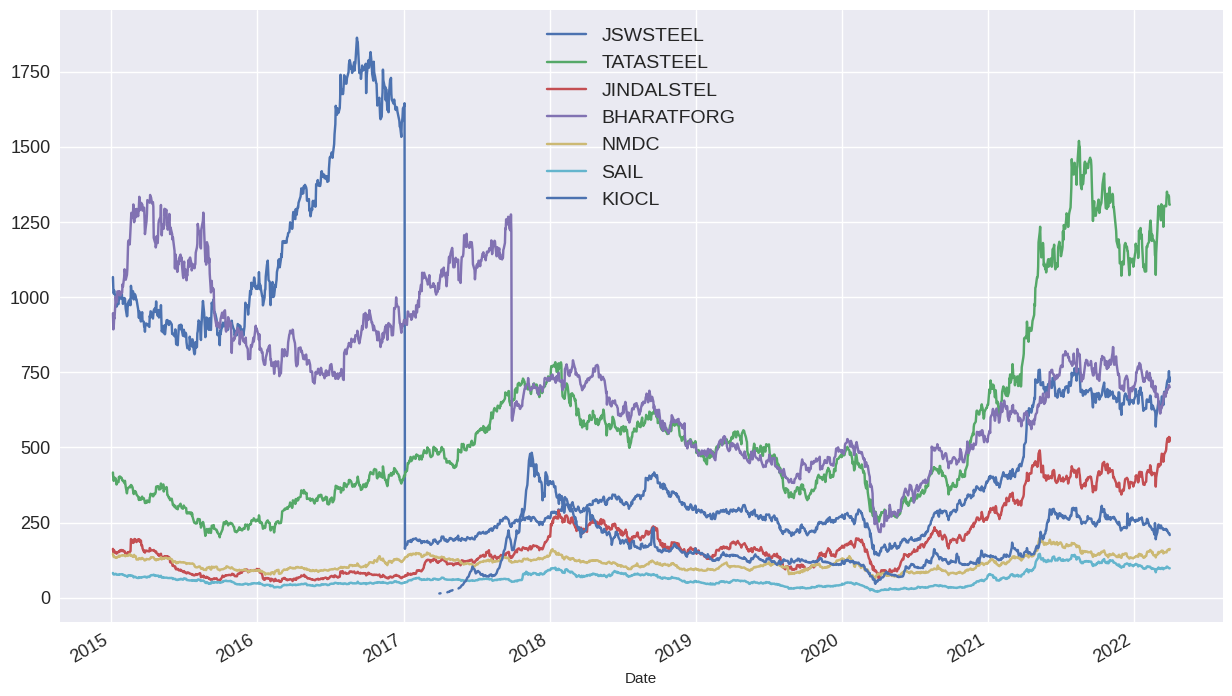

In [14]:
close.plot(figsize = (15, 9 ), fontsize = 13)
plt.legend(fontsize = 14)
plt.show()

# Normalizing Time Series to a Base Value (100)

In [15]:
close.head()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN


In [16]:
close.iloc[0,0]

1066.6

In [17]:
close.JSWSTEEL.div(close.iloc[0,0]).mul(100)# this is used to check wheather stock go up or down from selected date

Date
2015-01-05    100.000000
2015-01-06     96.352897
2015-01-07     94.866867
2015-01-08     95.827864
2015-01-09     94.969998
                 ...    
2022-03-25     67.630789
2022-03-28     68.451153
2022-03-29     70.682543
2022-03-30     67.274517
2022-03-31     68.690231
Name: JSWSTEEL, Length: 1793, dtype: float64

In [18]:
close.iloc[0]

JSWSTEEL      1066.60
TATASTEEL      416.70
JINDALSTEL     162.85
BHARATFORG     946.30
NMDC           146.20
SAIL            82.70
KIOCL             NaN
Name: 2015-01-05 00:00:00, dtype: float64

In [19]:
norm = close.div(close.iloc[0]).mul(100)
norm

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
2015-01-06,96.352897,95.152388,93.736567,94.335834,95.725034,95.102781,NaN
2015-01-07,94.866867,93.328534,92.324225,95.149530,92.920657,94.074970,NaN
2015-01-08,95.827864,94.780418,96.960393,98.362042,94.083447,95.707376,NaN
2015-01-09,94.969998,95.908327,93.859380,98.177111,92.578659,94.981862,NaN
...,...,...,...,...,...,...,...
2022-03-25,67.630789,321.322294,325.237949,72.947268,107.489740,124.667473,NaN
2022-03-28,68.451153,321.322294,319.189438,73.919476,110.396717,120.737606,NaN
2022-03-29,70.682543,320.290377,328.553884,74.812427,108.686731,119.467956,NaN


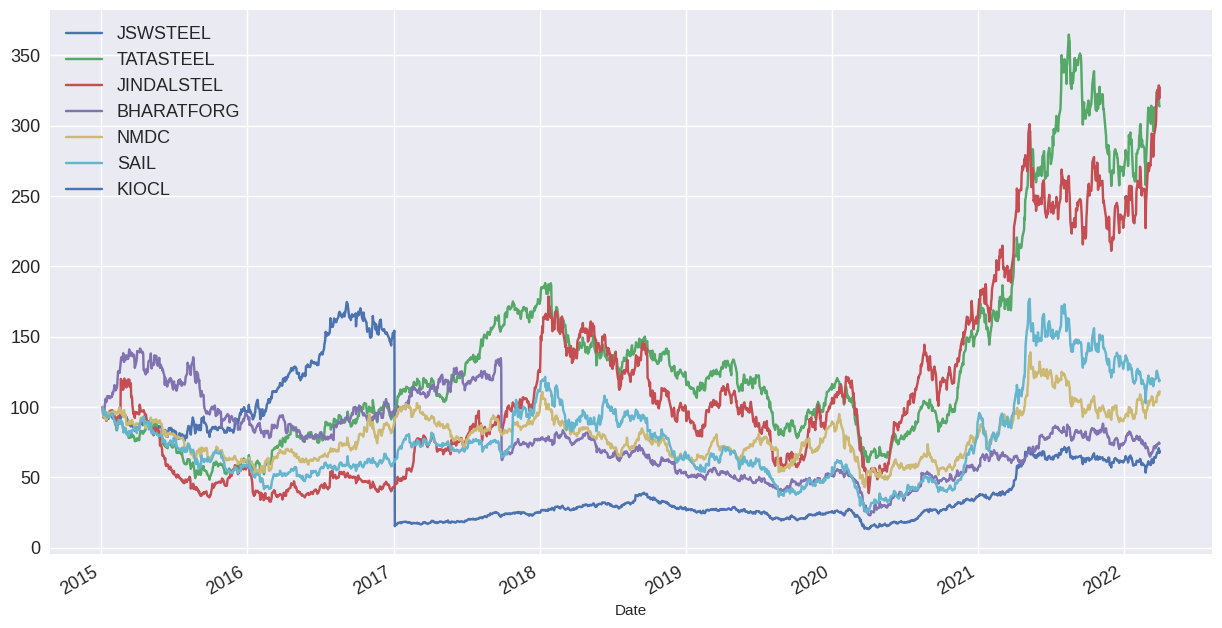

In [20]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# The shift() method

In [21]:
close.head()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN


In [22]:
TATA = close.TATASTEEL.copy().to_frame()

In [23]:
TATA.head()

,TATASTEEL
Date,
2015-01-05,416.70
2015-01-06,396.50
2015-01-07,388.90
2015-01-08,394.95
2015-01-09,399.65


In [24]:
TATA.shift(periods = 1)

,TATASTEEL
Date,
2015-01-05,NaN
2015-01-06,416.70
2015-01-07,396.50
2015-01-08,388.90
2015-01-09,394.95
...,...
2022-03-25,1350.55
2022-03-28,1338.95
2022-03-29,1338.95


In [25]:
TATA["lag1"] = TATA.shift(periods = 1)# used to check daily basis change

In [26]:
TATA.head()

,TATASTEEL,lag1
Date,,
2015-01-05,416.70,NaN
2015-01-06,396.50,416.70
2015-01-07,388.90,396.50
2015-01-08,394.95,388.90
2015-01-09,399.65,394.95


In [27]:
TATA.TATASTEEL.sub(TATA.lag1)

Date
2015-01-05      NaN
2015-01-06   -20.20
2015-01-07    -7.60
2015-01-08     6.05
2015-01-09     4.70
              ...  
2022-03-25   -11.60
2022-03-28     0.00
2022-03-29    -4.30
2022-03-30   -26.60
2022-03-31    -0.85
Length: 1793, dtype: float64

In [28]:
TATA["Diff"] = TATA.TATASTEEL.sub(TATA.lag1)

In [29]:
TATA.head()

,TATASTEEL,lag1,Diff
Date,,,
2015-01-05,416.70,NaN,NaN
2015-01-06,396.50,416.70,-20.20
2015-01-07,388.90,396.50,-7.60
2015-01-08,394.95,388.90,6.05
2015-01-09,399.65,394.95,4.70


In [30]:
TATA.TATASTEEL.div(TATA.lag1).sub(1).mul(100)

Date
2015-01-05         NaN
2015-01-06   -4.847612
2015-01-07   -1.916772
2015-01-08    1.555670
2015-01-09    1.190024
                ...   
2022-03-25   -0.858909
2022-03-28    0.000000
2022-03-29   -0.321147
2022-03-30   -1.993032
2022-03-31   -0.064982
Length: 1793, dtype: float64

In [31]:
TATA["pct_change"] = TATA.TATASTEEL.div(TATA.lag1).sub(1).mul(100)# used to check percentage changed

In [32]:
TATA.head()

,TATASTEEL,lag1,Diff,pct_change
Date,,,,
2015-01-05,416.70,NaN,NaN,NaN
2015-01-06,396.50,416.70,-20.20,-4.847612
2015-01-07,388.90,396.50,-7.60,-1.916772
2015-01-08,394.95,388.90,6.05,1.555670
2015-01-09,399.65,394.95,4.70,1.190024


# The methods diff() and pct_change()

In [33]:
TATA.head()

,TATASTEEL,lag1,Diff,pct_change
Date,,,,
2015-01-05,416.70,NaN,NaN,NaN
2015-01-06,396.50,416.70,-20.20,-4.847612
2015-01-07,388.90,396.50,-7.60,-1.916772
2015-01-08,394.95,388.90,6.05,1.555670
2015-01-09,399.65,394.95,4.70,1.190024


In [34]:
TATA.TATASTEEL.diff(periods = 2)

Date
2015-01-05      NaN
2015-01-06      NaN
2015-01-07   -27.80
2015-01-08    -1.55
2015-01-09    10.75
              ...  
2022-03-25     7.95
2022-03-28   -11.60
2022-03-29    -4.30
2022-03-30   -30.90
2022-03-31   -27.45
Name: TATASTEEL, Length: 1793, dtype: float64

In [35]:
TATA["Diff2"] = TATA.TATASTEEL.diff(periods = 1)

In [36]:
TATA

,TATASTEEL,lag1,Diff,pct_change,Diff2
Date,,,,,
2015-01-05,416.70,NaN,NaN,NaN,NaN
2015-01-06,396.50,416.70,-20.20,-4.847612,-20.20
2015-01-07,388.90,396.50,-7.60,-1.916772,-7.60
2015-01-08,394.95,388.90,6.05,1.555670,6.05
2015-01-09,399.65,394.95,4.70,1.190024,4.70
...,...,...,...,...,...
2022-03-25,1338.95,1350.55,-11.60,-0.858909,-11.60
2022-03-28,1338.95,1338.95,0.00,0.000000,0.00
2022-03-29,1334.65,1338.95,-4.30,-0.321147,-4.30


In [37]:
TATA.head()

,TATASTEEL,lag1,Diff,pct_change,Diff2
Date,,,,,
2015-01-05,416.70,NaN,NaN,NaN,NaN
2015-01-06,396.50,416.70,-20.20,-4.847612,-20.20
2015-01-07,388.90,396.50,-7.60,-1.916772,-7.60
2015-01-08,394.95,388.90,6.05,1.555670,6.05
2015-01-09,399.65,394.95,4.70,1.190024,4.70


In [38]:
TATA.Diff.equals(TATA.Diff2)

True

In [39]:
TATA["pct_change2"] = TATA.TATASTEEL.pct_change(periods = 1).mul(100)

In [40]:
TATA.head()

,TATASTEEL,lag1,Diff,pct_change,Diff2,pct_change2
Date,,,,,,
2015-01-05,416.70,NaN,NaN,NaN,NaN,NaN
2015-01-06,396.50,416.70,-20.20,-4.847612,-20.20,-4.847612
2015-01-07,388.90,396.50,-7.60,-1.916772,-7.60,-1.916772
2015-01-08,394.95,388.90,6.05,1.555670,6.05,1.555670
2015-01-09,399.65,394.95,4.70,1.190024,4.70,1.190024


In [41]:
TATA.TATASTEEL.resample("BM").last().pct_change(periods =1).mul(100)

Date
2015-01-30          NaN
2015-02-27   -10.193367
2015-03-31    -9.667760
2015-04-30    13.764799
2015-05-29    -8.838629
                ...    
2021-11-30   -18.598731
2021-12-31     3.757468
2022-01-31    -2.330289
2022-02-28    12.454516
2022-03-31     7.081712
Freq: BM, Name: TATASTEEL, Length: 87, dtype: float64

##  Measuring Stock Perfromance with MEAN Return and STD of Returns

In [42]:
import numpy as np

In [43]:
TATA = close.TATASTEEL.copy().to_frame()
TATA

,TATASTEEL
Date,
2015-01-05,416.70
2015-01-06,396.50
2015-01-07,388.90
2015-01-08,394.95
2015-01-09,399.65
...,...
2022-03-25,1338.95
2022-03-28,1338.95
2022-03-29,1334.65


In [44]:
TATA.pct_change().dropna()

,TATASTEEL
Date,
2015-01-06,-0.048476
2015-01-07,-0.019168
2015-01-08,0.015557
2015-01-09,0.011900
2015-01-12,-0.007256
...,...
2022-03-25,-0.008589
2022-03-28,0.000000
2022-03-29,-0.003211


In [45]:
ret = TATA.pct_change().dropna()
ret

,TATASTEEL
Date,
2015-01-06,-0.048476
2015-01-07,-0.019168
2015-01-08,0.015557
2015-01-09,0.011900
2015-01-12,-0.007256
...,...
2022-03-25,-0.008589
2022-03-28,0.000000
2022-03-29,-0.003211


In [46]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2015-01-06 to 2022-03-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TATASTEEL  1792 non-null   float64
dtypes: float64(1)
memory usage: 28.0 KB


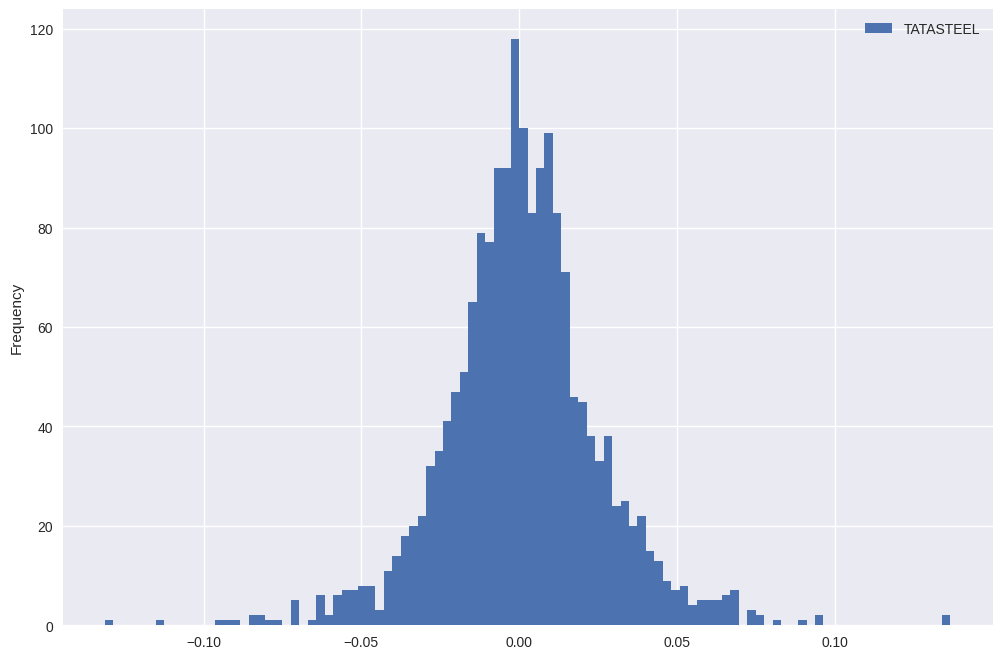

In [47]:
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)
plt.show()

In [48]:
daily_mean_Return = ret.mean()# avg return on stock
daily_mean_Return

TATASTEEL    0.000943
dtype: float64

In [49]:
var_daily_Returns = ret.var()#varriation in daily return of stock
var_daily_Returns

TATASTEEL    0.000609
dtype: float64

In [50]:
std_daily_Returns = np.sqrt(var_daily_Returns)#standard deviation calculation
std_daily_Returns

TATASTEEL    0.024682
dtype: float64

In [51]:
ret.std()#std deviation

TATASTEEL    0.024682
dtype: float64

In [52]:
ann_mean_Return = ret.mean() * 252# annualy return avrg
ann_mean_Return

TATASTEEL    0.237534
dtype: float64

In [53]:
ann_var_Returns = ret.var() * 252# annualy variation in stock
ann_var_Returns

TATASTEEL    0.153518
dtype: float64

In [54]:
ann_std_Returns = np.sqrt(ann_var_Returns)
ann_std_Returns

TATASTEEL    0.391814
dtype: float64

In [55]:
ret.std() * np.sqrt(252)#annually deviation possibalities

TATASTEEL    0.391814
dtype: float64

## Financial Time Series - Return and Risk

In [56]:
import numpy as np

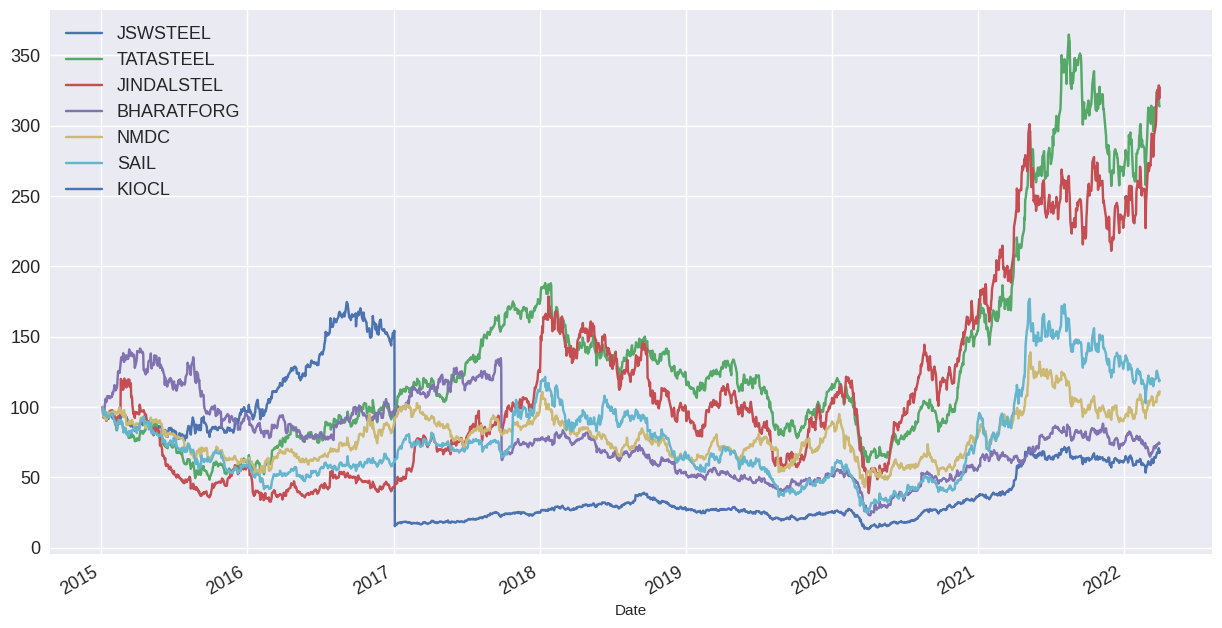

In [57]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [58]:
close.head()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN


In [59]:
close.pct_change().dropna()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2017-03-02,-0.033193,-0.011392,-0.009505,-0.009649,-0.033611,-0.022889,0.000000
2017-03-03,0.002725,0.000910,0.010796,0.001152,0.006887,0.004039,0.000000
2017-03-06,0.004620,-0.004848,-0.003560,0.028667,0.002052,0.003218,0.000000
2017-03-07,-0.018393,-0.021717,-0.009131,-0.022183,0.005119,-0.031275,0.000000
2017-03-08,-0.018738,-0.019813,-0.020032,-0.006291,-0.042784,-0.010762,0.000000
...,...,...,...,...,...,...,...
2022-03-25,0.008740,-0.008589,0.015336,-0.005690,0.000318,-0.008654,-0.015058
2022-03-28,0.012130,0.000000,-0.018597,0.013328,0.027044,-0.031523,-0.034397
2022-03-29,0.032598,-0.003211,0.029338,0.012080,-0.015489,-0.010516,0.000233


In [60]:
ret = close.pct_change().dropna()

In [61]:
ret.head()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2017-03-02,-0.033193,-0.011392,-0.009505,-0.009649,-0.033611,-0.022889,0.0
2017-03-03,0.002725,0.000910,0.010796,0.001152,0.006887,0.004039,0.0
2017-03-06,0.004620,-0.004848,-0.003560,0.028667,0.002052,0.003218,0.0
2017-03-07,-0.018393,-0.021717,-0.009131,-0.022183,0.005119,-0.031275,0.0
2017-03-08,-0.018738,-0.019813,-0.020032,-0.006291,-0.042784,-0.010762,0.0


In [62]:
ret.describe().T.loc[:, ["mean", "std"]]

,mean,std
JSWSTEEL,0.001363,0.023996
TATASTEEL,0.001066,0.024608
JINDALSTEL,0.001734,0.034408
BHARATFORG,0.000126,0.027970
NMDC,0.000373,0.024831
SAIL,0.000826,0.030904
KIOCL,0.002901,0.036809


In [63]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
JSWSTEEL,0.001363,0.023996
TATASTEEL,0.001066,0.024608
JINDALSTEL,0.001734,0.034408
BHARATFORG,0.000126,0.027970
NMDC,0.000373,0.024831
SAIL,0.000826,0.030904
KIOCL,0.002901,0.036809


In [64]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)#annually return and deviation possibilties

In [65]:
summary

,mean,std
JSWSTEEL,0.343436,0.380921
TATASTEEL,0.268515,0.390640
JINDALSTEL,0.436931,0.546217
BHARATFORG,0.031643,0.444004
NMDC,0.093966,0.394182
SAIL,0.208117,0.490587
KIOCL,0.731026,0.584319


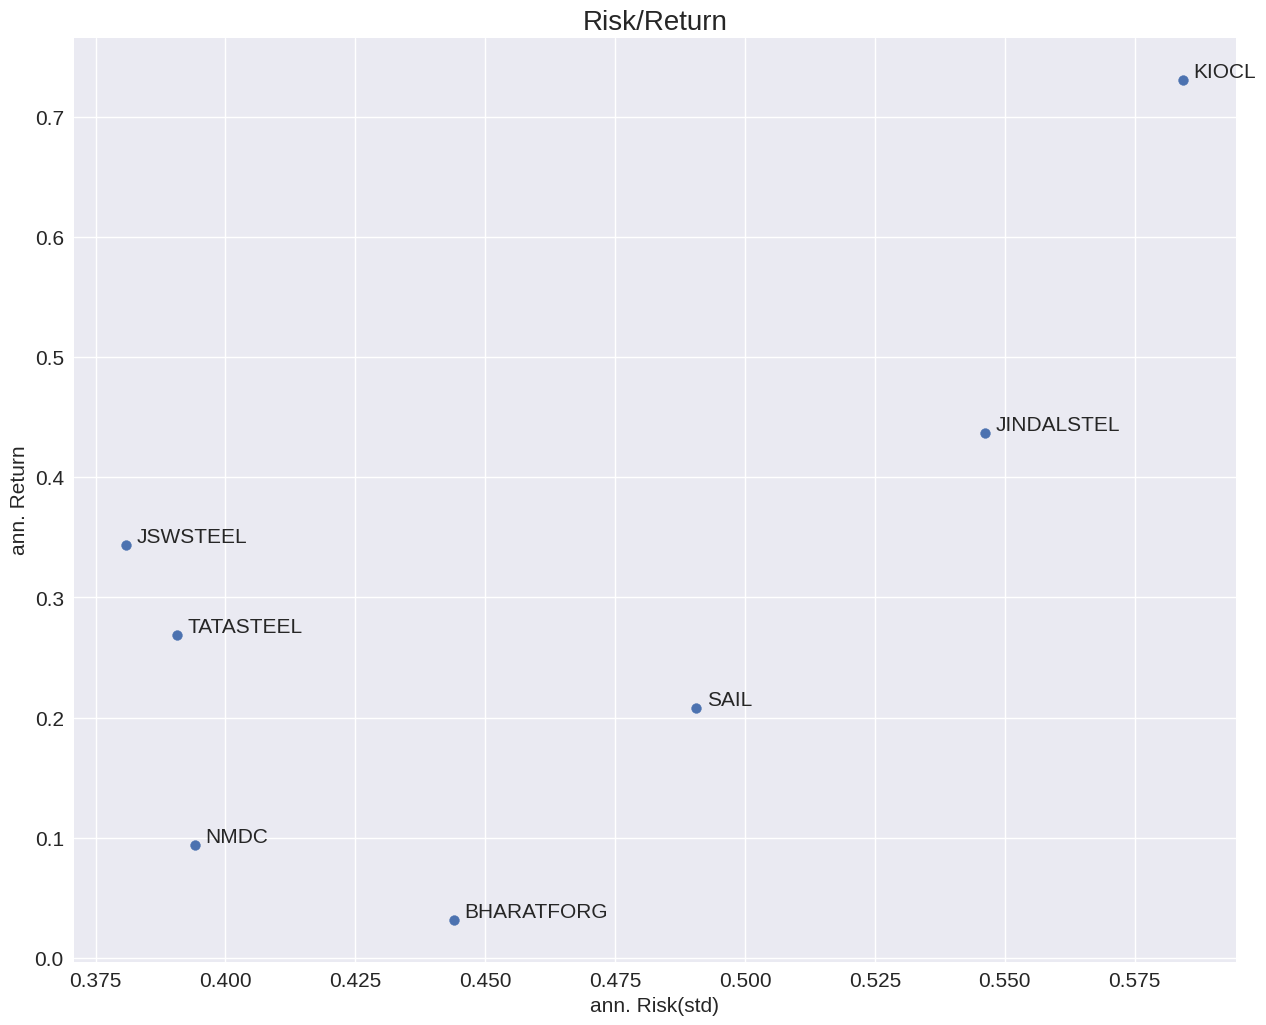

In [66]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Financial Time Series - Covariance and Correlation

In [67]:
ret.head()

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2017-03-02,-0.033193,-0.011392,-0.009505,-0.009649,-0.033611,-0.022889,0.0
2017-03-03,0.002725,0.000910,0.010796,0.001152,0.006887,0.004039,0.0
2017-03-06,0.004620,-0.004848,-0.003560,0.028667,0.002052,0.003218,0.0
2017-03-07,-0.018393,-0.021717,-0.009131,-0.022183,0.005119,-0.031275,0.0
2017-03-08,-0.018738,-0.019813,-0.020032,-0.006291,-0.042784,-0.010762,0.0


In [68]:
ret.cov()# used to check variantion between stock

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
JSWSTEEL,0.000576,0.000432,0.000579,0.000246,0.000292,0.000490,0.000183
TATASTEEL,0.000432,0.000606,0.000616,0.000254,0.000343,0.000565,0.000187
JINDALSTEL,0.000579,0.000616,0.001184,0.000354,0.000433,0.000740,0.000294
BHARATFORG,0.000246,0.000254,0.000354,0.000782,0.000240,0.000325,0.000227
NMDC,0.000292,0.000343,0.000433,0.000240,0.000617,0.000432,0.000253
SAIL,0.000490,0.000565,0.000740,0.000325,0.000432,0.000955,0.000298
KIOCL,0.000183,0.000187,0.000294,0.000227,0.000253,0.000298,0.001355


In [69]:
ret.corr()# check for find relation between stock

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
JSWSTEEL,1.000000,0.732227,0.701418,0.366055,0.490478,0.660375,0.207103
TATASTEEL,0.732227,1.000000,0.727815,0.369109,0.561866,0.742970,0.206593
JINDALSTEL,0.701418,0.727815,1.000000,0.368079,0.506366,0.695640,0.232088
BHARATFORG,0.366055,0.369109,0.368079,1.000000,0.345950,0.376279,0.220609
NMDC,0.490478,0.561866,0.506366,0.345950,1.000000,0.563048,0.277190
SAIL,0.660375,0.742970,0.695640,0.376279,0.563048,1.000000,0.261537
KIOCL,0.207103,0.206593,0.232088,0.220609,0.277190,0.261537,1.000000


In [70]:
import seaborn as sns

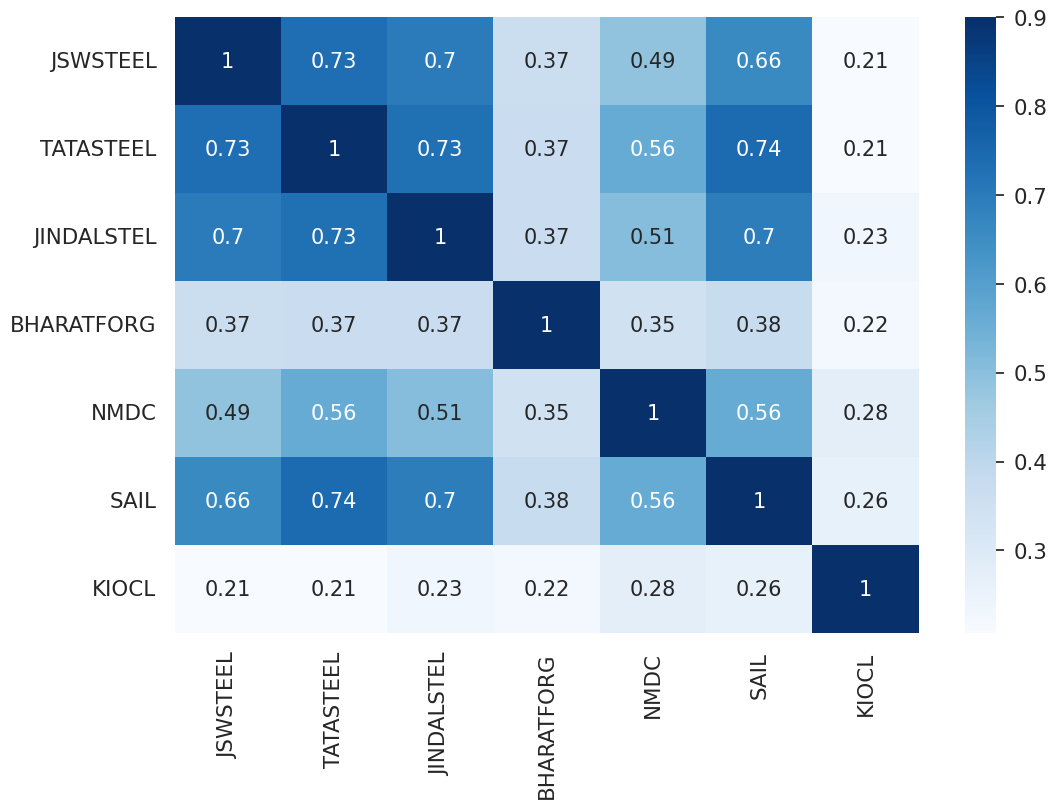

In [71]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Blues", annot = True, annot_kws={"size":15}, vmax = 0.9)
plt.show()

## Simple Returns vs. Log Returns

In [72]:
# NSE_500 = []
NSE_500 = get_history(symbol="BSE 500",start=date(2005,1,4),end=date(2010,3,31))

In [73]:
NSE_500

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,


In [74]:
BSE_500 = NSE_500.drop(["Symbol","Series"],axis= 1)

In [75]:
BSE_500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Prev Close          0 non-null      object
 1   Open                0 non-null      object
 2   High                0 non-null      object
 3   Low                 0 non-null      object
 4   Last                0 non-null      object
 5   Close               0 non-null      object
 6   VWAP                0 non-null      object
 7   Volume              0 non-null      object
 8   Turnover            0 non-null      object
 9   Trades              0 non-null      object
 10  Deliverable Volume  0 non-null      object
 11  %Deliverble         0 non-null      object
dtypes: object(12)
memory usage: 0.0+ bytes


In [76]:
BSE_500.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
BSE_500.to_excel("BSE500.xls")

/tmp/ipykernel_17979/4100215072.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  BSE_500.to_excel("BSE500.xls")


In [10]:
BSE500 = pd.read_excel("BSE500.xls" ,parse_dates=["Date"],index_col="Date")
BSE500

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2018-05-16,149.45,148.54,148.54,147.87,147.95,147.87,147.88,33804,4.998904e+11,6,33800,0.9999
2018-05-17,147.87,150.00,151.00,148.13,148.13,148.13,150.28,35109,5.276167e+11,10,35109,1.0000
2018-05-18,148.13,146.89,146.89,145.80,145.80,145.80,146.35,10,1.463450e+08,2,10,1.0000
2018-05-21,145.80,150.00,150.00,143.99,143.99,144.56,145.09,41833,6.069701e+11,12,41200,0.9849
2018-05-22,144.56,148.91,148.91,116.87,144.35,144.33,138.72,45205,6.270842e+11,37,40910,0.9050
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,24.28,24.65,24.65,24.18,24.30,24.29,24.29,57871,1.405920e+11,324,32820,0.5671
2022-03-28,24.29,24.29,24.64,23.90,24.30,24.26,24.20,21565,5.219667e+10,429,13065,0.6058
2022-03-29,24.26,24.26,24.60,24.02,24.37,24.43,24.41,16747,4.087229e+10,276,8605,0.5138


In [78]:
new1_df1.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,JSWSTEEL,...,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL,KIOCL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1069.15,1069.15,1087.00,1058.00,1065.00,1066.60,1073.82,339287,3.643329e+13,12749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,1066.60,1054.10,1058.95,1020.55,1022.10,1027.70,1038.21,554980,5.761852e+13,16258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,1027.70,1016.00,1025.80,997.25,1013.55,1011.85,1010.51,528687,5.342434e+13,18120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,1011.85,1025.00,1034.90,998.60,1021.15,1022.10,1011.86,478081,4.837492e+13,31335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,1022.10,1027.00,1035.00,1004.05,1010.05,1012.95,1015.75,504604,5.125523e+13,18333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
close2 = new1_df1.loc[:, "Close"].copy()

In [80]:
close2

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN
...,...,...,...,...,...,...,...
2022-03-25,721.35,1338.95,529.65,690.30,157.15,103.10,222.40
2022-03-28,730.10,1338.95,519.80,699.50,161.40,99.85,214.75
2022-03-29,753.90,1334.65,535.05,707.95,158.90,98.80,214.80


In [82]:
close2.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2022-03-17', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', length=1793, freq=None)

In [83]:
close2.index.day

Int64Index([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16,
            ...
            17, 21, 22, 23, 24, 25, 28, 29, 30, 31],
           dtype='int64', name='Date', length=1793)

In [84]:
close2.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=1793)

In [85]:
close2.index.week

/tmp/ipykernel_23180/566845464.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  close2.index.week


Int64Index([ 2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
            ...
            11, 12, 12, 12, 12, 12, 13, 13, 13, 13],
           dtype='int64', name='Date', length=1793)

In [86]:
close2.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=1793)

In [87]:
close2.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            3, 0, 1, 2, 3, 4, 0, 1, 2, 3],
           dtype='int64', name='Date', length=1793)

In [89]:
close2.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=1793)

In [90]:
close2.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March'],
      dtype='object', name='Date', length=1793)

In [92]:
close2.index.days_in_month

Int64Index([31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='Date', length=1793)

In [93]:
close2.index.weekofyear

/tmp/ipykernel_23180/1153399341.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  close2.index.weekofyear


Int64Index([ 2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
            ...
            11, 12, 12, 12, 12, 12, 13, 13, 13, 13],
           dtype='int64', name='Date', length=1793)

In [94]:
close2.index.is_month_end

array([False, False, False, ..., False, False,  True])

In [96]:
close2["Day"] = close2.index.day_name()
close2["Quarter"] = close2.index.quarter

In [97]:
close2

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL,Day,Quarter
Date,,,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN,Monday,1
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN,Tuesday,1
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN,Wednesday,1
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN,Thursday,1
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN,Friday,1
...,...,...,...,...,...,...,...,...,...
2022-03-25,721.35,1338.95,529.65,690.30,157.15,103.10,222.40,Friday,1
2022-03-28,730.10,1338.95,519.80,699.50,161.40,99.85,214.75,Monday,1
2022-03-29,753.90,1334.65,535.05,707.95,158.90,98.80,214.80,Tuesday,1


In [98]:
all_days = pd.date_range(start = "2015-1-4", end = "2022-03-31", freq = "D")#(2015,1,4),end=date(2022,3,31)
all_days

DatetimeIndex(['2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', length=2644, freq='D')

In [100]:
close2 = close2.reindex(all_days)
close2

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL,Day,Quarter
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN,Monday,1.0
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN,Tuesday,1.0
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN,Wednesday,1.0
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN,Thursday,1.0
...,...,...,...,...,...,...,...,...,...
2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-28,730.10,1338.95,519.80,699.50,161.40,99.85,214.75,Monday,1.0
2022-03-29,753.90,1334.65,535.05,707.95,158.90,98.80,214.80,Tuesday,1.0
2022-03-30,717.55,1308.05,519.85,702.60,159.20,97.75,213.65,Wednesday,1.0


In [102]:
close2.head(20)

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL,Day,Quarter
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN,Monday,1.0
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN,Tuesday,1.0
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN,Wednesday,1.0
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN,Thursday,1.0
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN,Friday,1.0
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,1000.70,396.75,149.40,1001.30,133.70,80.00,NaN,Monday,1.0
2015-01-13,993.45,391.50,148.75,985.10,135.00,78.25,NaN,Tuesday,1.0


In [104]:
close2.Day = close2.index.day_name()
close2.Quarter = close2.index.quarter

In [105]:
close2

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL,Day,Quarter
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,1
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN,Monday,1
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN,Tuesday,1
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN,Wednesday,1
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN,Thursday,1
...,...,...,...,...,...,...,...,...,...
2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,1
2022-03-28,730.10,1338.95,519.80,699.50,161.40,99.85,214.75,Monday,1
2022-03-29,753.90,1334.65,535.05,707.95,158.90,98.80,214.80,Tuesday,1
2022-03-30,717.55,1308.05,519.85,702.60,159.20,97.75,213.65,Wednesday,1


In [106]:
close2.fillna(method = "ffill", inplace= True)

In [107]:
close.head(15)

,JSWSTEEL,TATASTEEL,JINDALSTEL,BHARATFORG,NMDC,SAIL,KIOCL
Date,,,,,,,
2015-01-05,1066.60,416.70,162.85,946.30,146.20,82.70,NaN
2015-01-06,1027.70,396.50,152.65,892.70,139.95,78.65,NaN
2015-01-07,1011.85,388.90,150.35,900.40,135.85,77.80,NaN
2015-01-08,1022.10,394.95,157.90,930.80,137.55,79.15,NaN
2015-01-09,1012.95,399.65,152.85,929.05,135.35,78.55,NaN
2015-01-12,1000.70,396.75,149.40,1001.30,133.70,80.00,NaN
2015-01-13,993.45,391.50,148.75,985.10,135.00,78.25,NaN
2015-01-14,968.25,376.85,146.85,983.20,132.70,77.05,NaN
2015-01-15,970.95,384.75,151.80,983.95,133.75,77.55,NaN
